In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/Neha/OneDrive/Desktop/Churn Analysis/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
#First Step in EDA is to Inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0") #here there are many blank spaces so we replace that blank spaces to 0
df["TotalCharges"]=df["TotalCharges"].astype("float") #and here convert datatype of TotalCharge object to float

In [28]:
df.isnull().sum() #tells whether your data have null values or not so here there are 0 null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.describe() #to see discriptive analysis

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [31]:
df.duplicated().sum() #checks whether data have duplicates or not so here there are 0 duplicates

0

In [33]:
df["customerID"].duplicated().sum() #here we are checking duplicates based on customer Id bcoz to see if someone make double entry previously we see entire row wise but as this we know this id column is unique and it should not contain any duplicate value 

0

In [35]:
# Here in our data the column senior citizen has value 0 and 1 
#as 0 is for false and 1 is for true so we convert this values as yes or no for easier to understand
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv) #apply the above created function to the SeniorCitizen column

In [36]:
df.head() #To see first five records

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


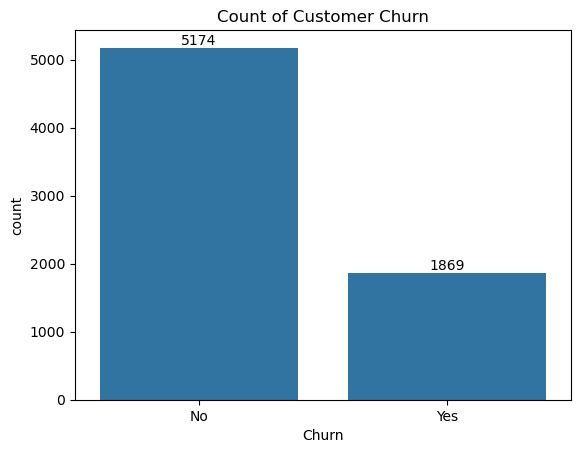

In [51]:
# We are applying to count plot to see exact count of churn yes and no in bar graph
ax=sns.countplot(x= 'Churn' , data=df)
ax.bar_label(ax.containers[0]) #to see actual count of No ans Yes
plt.title("Count of Customer Churn")
plt.show()

In [46]:
# To see above count in groupby
gb=df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


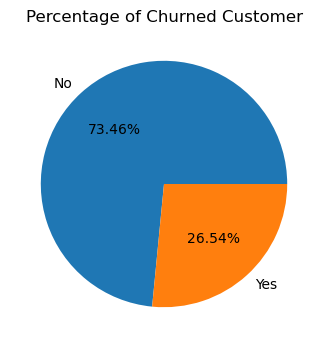

In [56]:
#Show count in pie chart i.e in percentage
plt.figure(figsize=(4,4)) #to show in perticular size
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customer",fontsize=12) #Title with fontsize
plt.show()

#From above we can say that 26.54% are churned out ,lets now explore the reason behind it

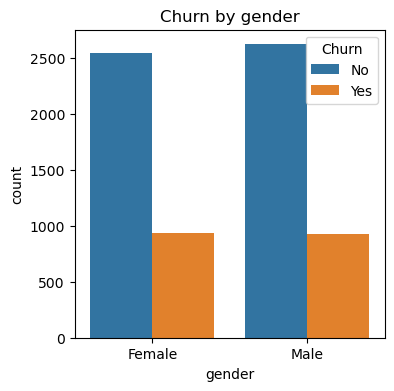

In [60]:
#plot bar grap based on count of male and female with respective churn
plt.figure(figsize=(4,4))
sns.countplot(x='gender',data=df,hue='Churn')#hue gives filter to churn value
plt.title("Churn by gender")
plt.show()

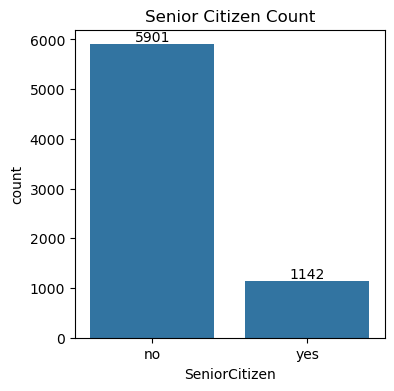

In [73]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.title("Senior Citizen Count")
plt.show()

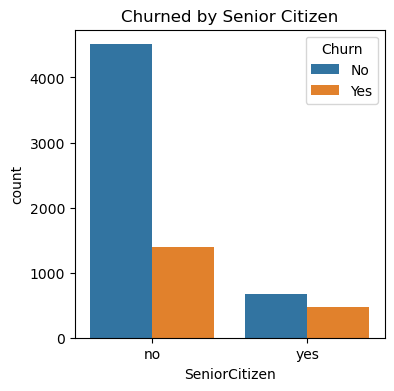

In [70]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.title("Churned by Senior Citizen")
plt.show()

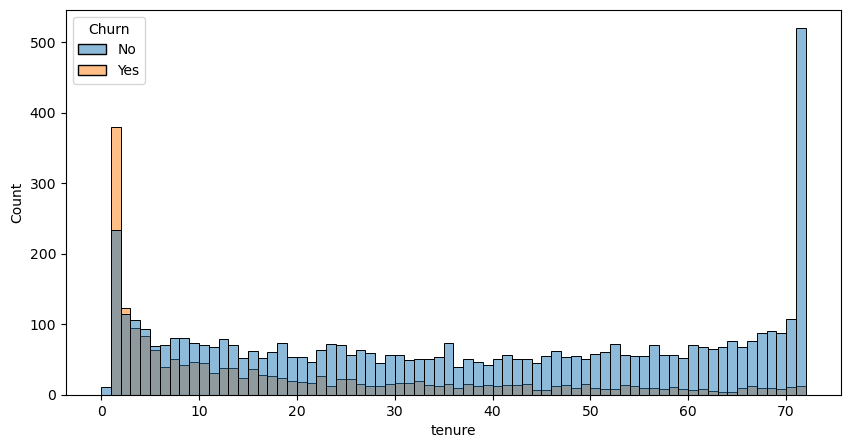

In [85]:
#Plot histogram based on tenure
plt.figure(figsize=(10,5))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')#bins is used to that bar here u can see each and evey value as there is lowest value is 0 and highest value is 72
plt.show()

#From above we can say that people who have used our services for long time have stayed and people who have used our services  for 1 or 2 months are churned 

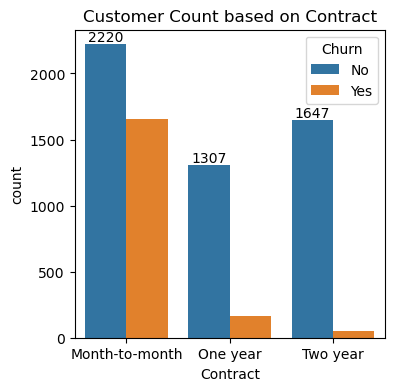

In [87]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Customer Count based on Contract")
plt.show()

#From above we can say that people who have month-to-month contract are likely to churn compare to people who have one year or two year contract

In [89]:
df.columns.values #gives column names

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

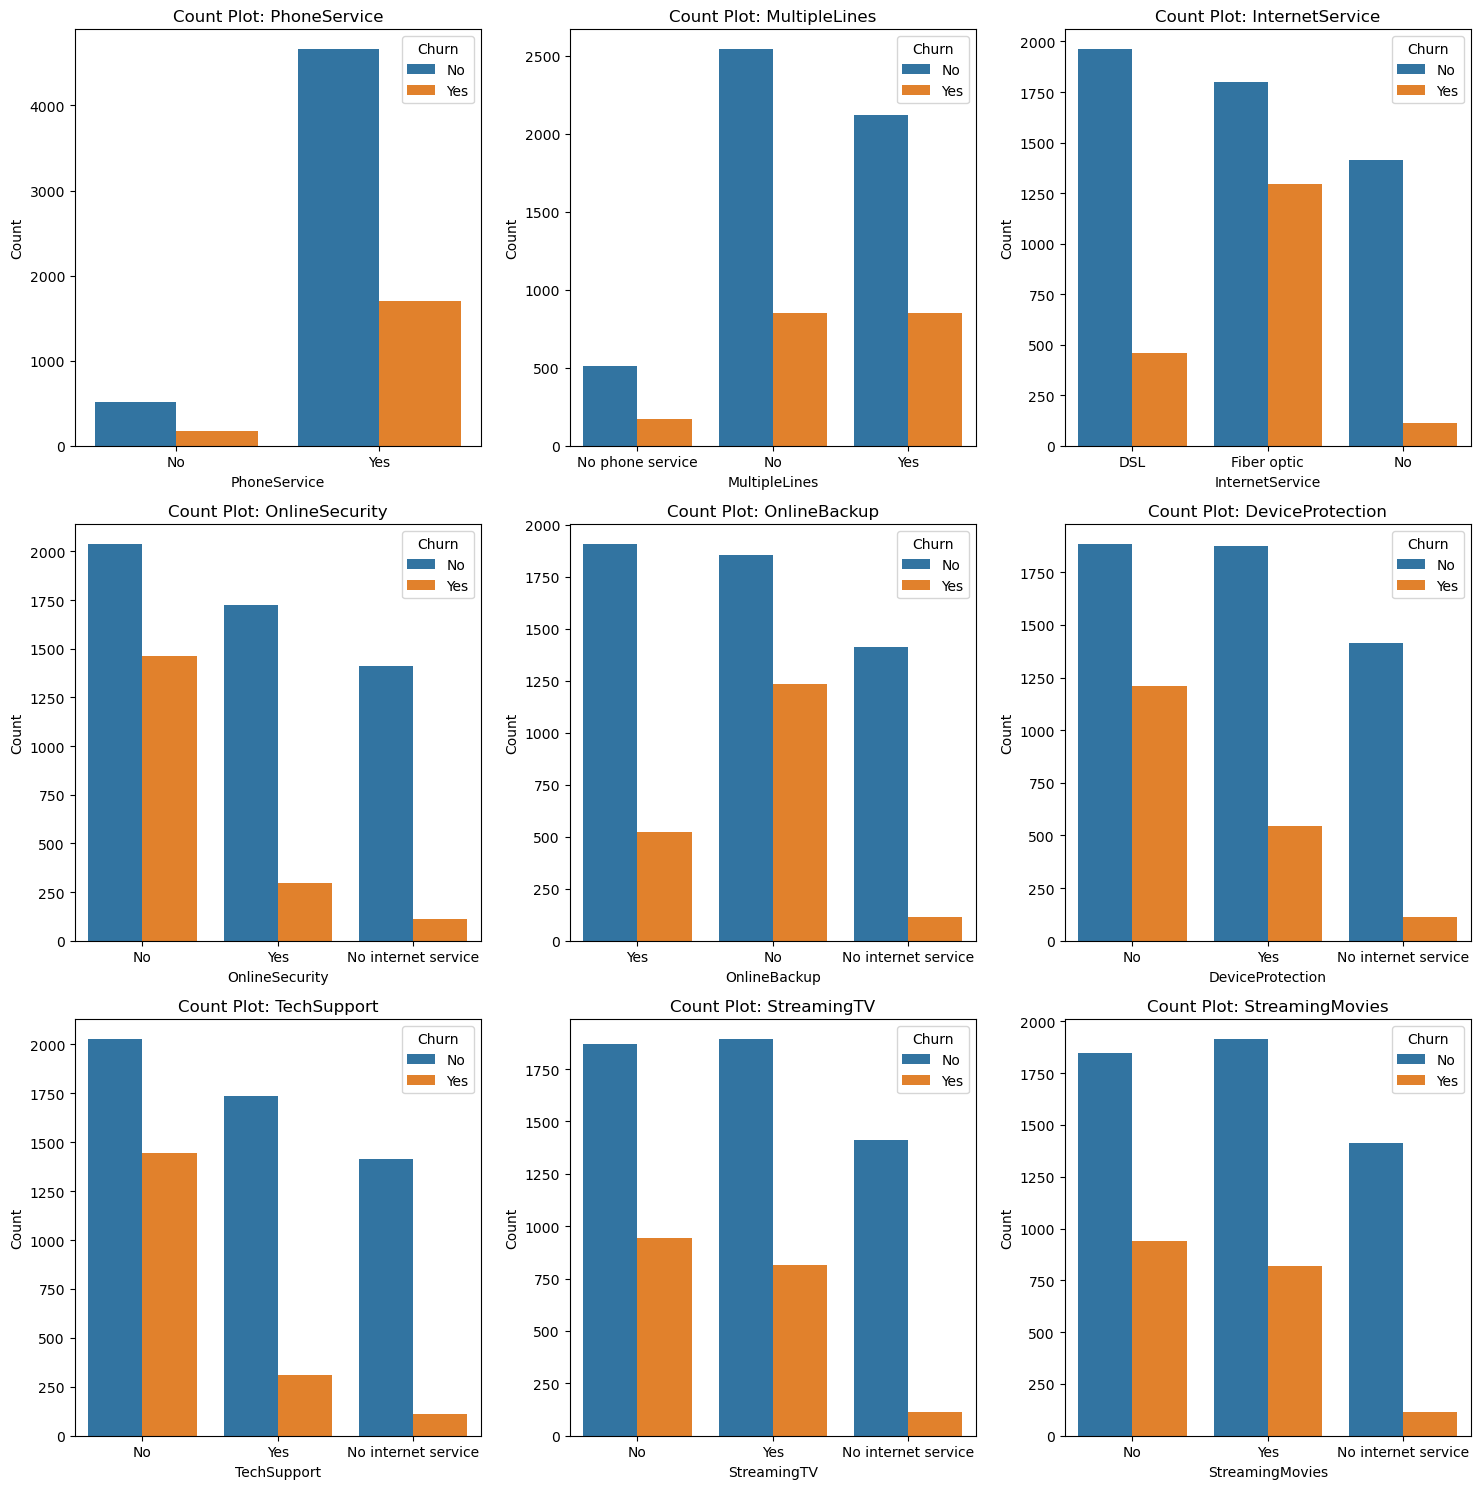

In [95]:
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the subplots
num_cols = 3  # Number of subplots per row
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Calculate number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create a count plot for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Count Plot: {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide any extra subplots (if the number of plots is less than the grid)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

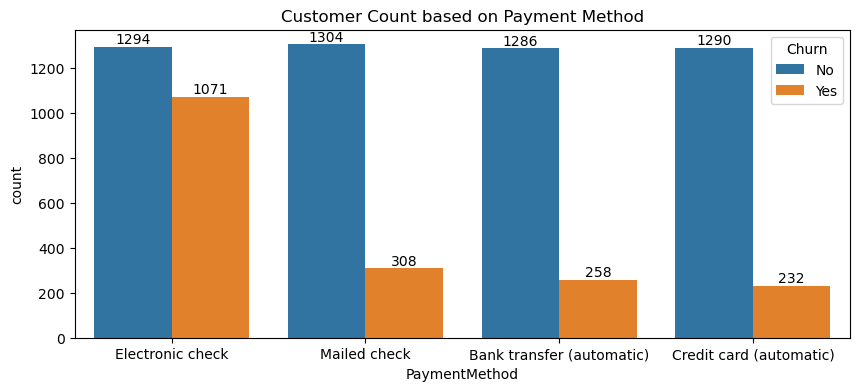

In [103]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer Count based on Payment Method")
#plt.xticks(rotation=70) to rotate the x-axis lables
plt.show()

#The bar chart displays customer counts based on their payment methods and whether they have churned (left the service).
#Overall, most customers have not churned, especially those using Electronic checks and Mailed checks, while churn rates for all methods are relatively low.